In [1]:
import sys
from ase.build import bulk
from ase.visualize.plot import plot_atoms
from ase.build.surfaces_with_termination import surfaces_with_termination
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(25,10))
import numpy as np
from ase.build import sort
from ase.io.vasp import read_vasp
from ase.build import surface, make_supercell
from ase.build import sort
from ase.geometry import get_layers
import Tools as tl

from ase.visualize import view

## Creo celda ZrO2 2x2 y un sitio tipo 'hollow1'

In [2]:
zro2 = read_vasp('Structure/POSCAR')
ZrO2001Oterm = surfaces_with_termination(zro2, [0,0,1],layers=4, vacuum=15., termination='O',verbose=True, symmetric=True)

([4], ['Zr']) ([20], ['O'])
([3], ['O']) ([18], ['O'])
([5], ['Zr']) ([21], ['O'])
([2], ['O']) ([19], ['O'])


In [3]:
ZrO2001Oterm_2x2_unsorted = [make_supercell(thisurface,[[2,0,0],[0,2,0],[0,0,1]],tol=1e-10, wrap=True) for thisurface in ZrO2001Oterm]
ZrO2001Oterm_2x2 = sort(ZrO2001Oterm_2x2_unsorted[0])

layer, height = get_layers(ZrO2001Oterm_2x2, (0,0,1), tolerance=0.7)
h_sitios = max(height)
hollow1 = ZrO2001Oterm_2x2.positions[layer == 13].mean(axis=0)[:2]
hollow1 = np.append(hollow1, h_sitios)
ZrO2001Oterm_2x2.info = {'adatom': {'top': {'hollow1': hollow1}}}
onhollow1 = tl.make_adstruc(ZrO2001Oterm_2x2, 'hollow1', thesite='hollow1', theface='top',)

## Creo celda Zr 1x1, roto, hago simetria, agrego sitio tipo "top"

In [4]:
zrhcp = bulk('Zr', crystalstructure='hcp')
zrortho = bulk('Zr', crystalstructure='hcp', orthorhombic=True)

Zr0001 = surfaces_with_termination(zrortho, (0, 0, 1), 5, vacuum=10, termination='Zr')[0]

# Lo de arriba no estaria funcionando. 

In [5]:
zrsymmetric = tl.make_symmetric(Zr0001,natoms=2)

In [6]:
angs = np.linspace(0,45,4)

In [7]:
notyetrotated = [zrsymmetric.copy() for ang in angs ]

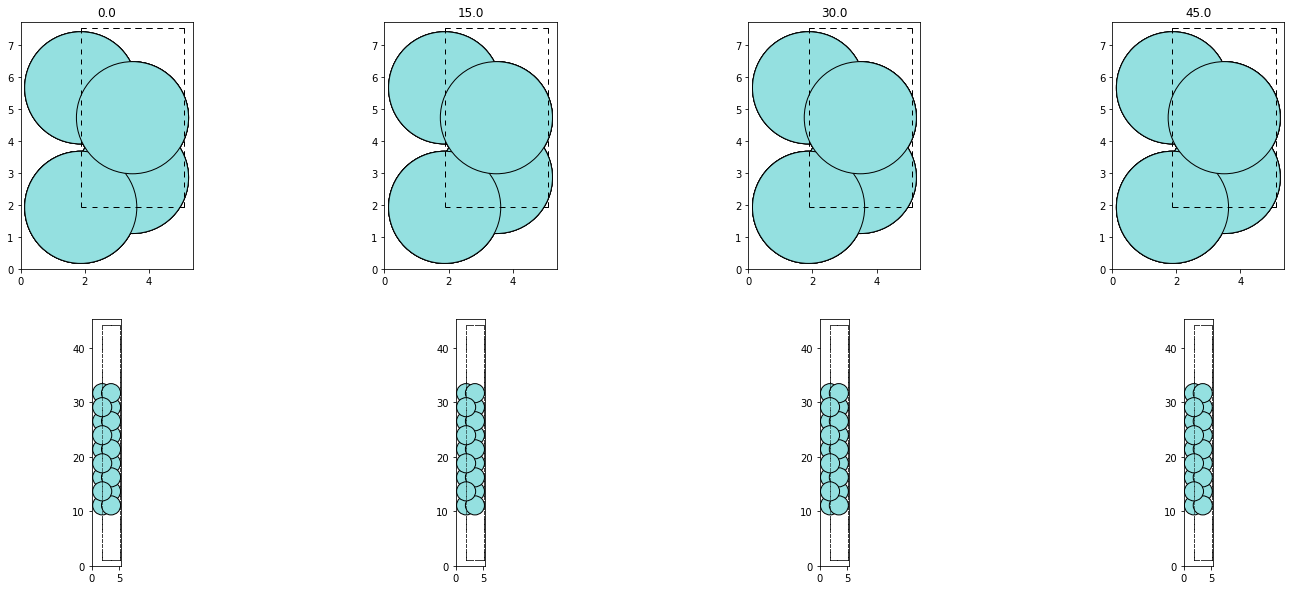

In [8]:
tl.plotcases(notyetrotated, angs)

In [17]:
scaled = [tl.scalecell(thisatoms, ZrO2001Oterm_2x2.cell.copy()) for thisatoms in notyetrotated]

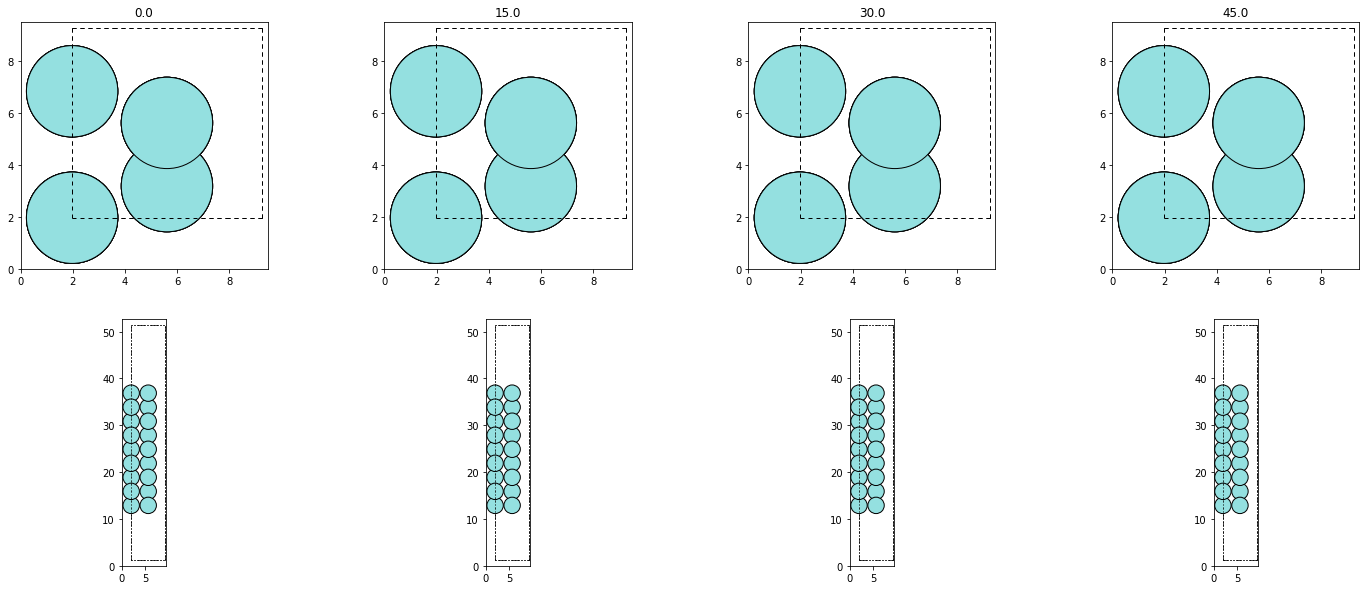

In [18]:
tl.plotcases(scaled, angs)

In [19]:
scaled_rotated =  [thiscaled.rotate(ang,'z') for thiscaled, ang in zip(scaled, angs)]

In [20]:
getsites = [tl.get_adsite(this,face='bottom', site='top') for this in scaled]

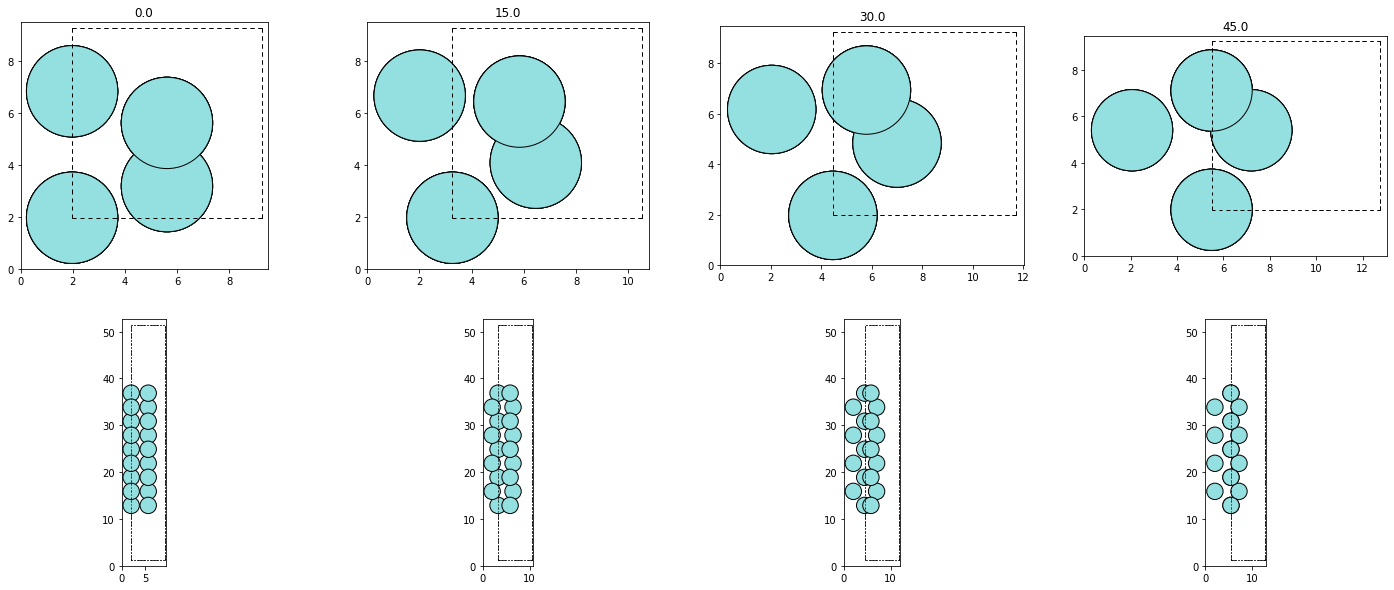

In [22]:
tl.plotcases(scaled, angs)

In [14]:
thestack, part1, part2 = tl.stack(ZrO2001Oterm_2x2, scaled[0], 'hollow1', 'top', 4, return_parts = True)

In [15]:
thestack.wrap(pretty_translation=True)

(<Axes:>, <Axes:>, <Axes:>)

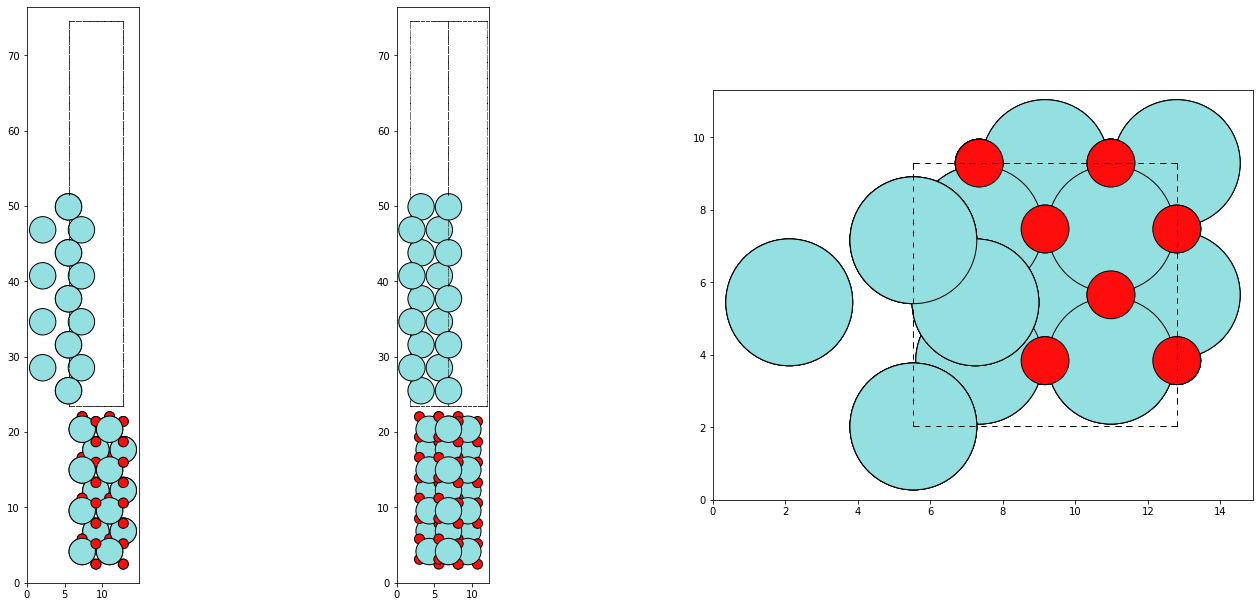

In [16]:
tl.plotviews(thestack)